In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IMAGE_SIZE = (128, 128)
NUM_CLASSES = 2
DATA_DIR = r'C:\Users\geeth\Downloads\test_data\YOLO-Object-Detection\DL project\Data'
DEFECTIVE_DIR = os.path.join(DATA_DIR, 'Defective_cubes')
QUALITY_DIR = os.path.join(DATA_DIR, 'Quality_cubes')

In [3]:
def load_data(directory):
    images = []
    labels = []
    label = 0 if directory == QUALITY_DIR else 1  # Assign label based on directory
    for filename in os.listdir(directory):
        if filename.lower().endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [4]:
defective_images, defective_labels = load_data(DEFECTIVE_DIR)
quality_images, quality_labels = load_data(QUALITY_DIR)
cube_images = np.concatenate([defective_images, quality_images], axis=0)
cube_labels = np.concatenate([defective_labels, quality_labels], axis=0)

In [12]:
train_images, test_images,train_labels, test_labels = train_test_split(cube_images, cube_labels, test_size=0.2, random_state=42)
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [14]:
print("Shape of train_images_normalized:", train_images_normalized.shape)
print("Shape of train_labels:", train_labels.shape)


Shape of train_images_normalized: (3579, 128, 128, 3)
Shape of train_labels: (3579,)


In [15]:
n_samples, width, height, channels = train_images_normalized.shape
train_images_flattened = train_images_normalized.reshape((n_samples, width * height * channels))


In [16]:
rf_classifier.fit(train_images_flattened, train_labels)


RandomForestClassifier(random_state=42)

In [19]:
n_samples, width, height, channels = test_images_normalized.shape
test_images_flattened = test_images_normalized.reshape((n_samples, width * height * channels))

In [20]:
accuracy = rf_classifier.score(test_images_flattened, test_labels)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.911731843575419


In [21]:
predictions = rf_classifier.predict(test_images_flattened)


In [22]:
conf_matrix = tf.math.confusion_matrix(test_labels, predictions)


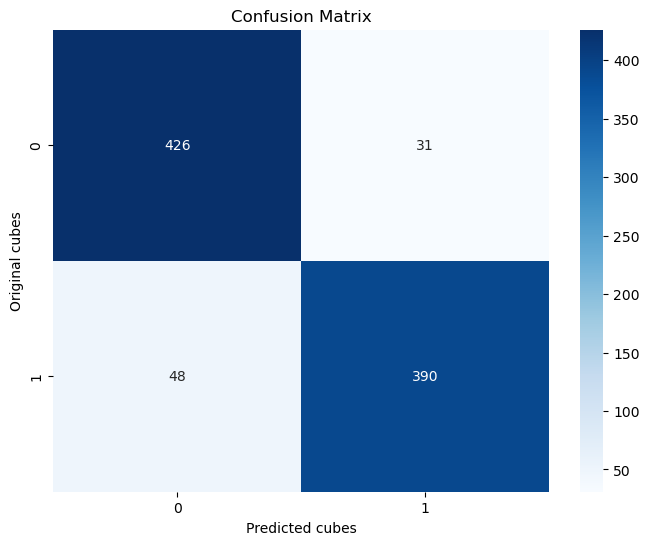

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted cubes')
plt.ylabel('Original cubes')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(test_labels, predictions, target_names=["Quality", "Defective"], output_dict=True)
precision_quality = report["Quality"]["precision"]
precision_defective = report["Defective"]["precision"]
recall_quality = report["Quality"]["recall"]
recall_defective = report["Defective"]["recall"]
f1_score_quality = report["Quality"]["f1-score"]
f1_score_defective = report["Defective"]["f1-score"]


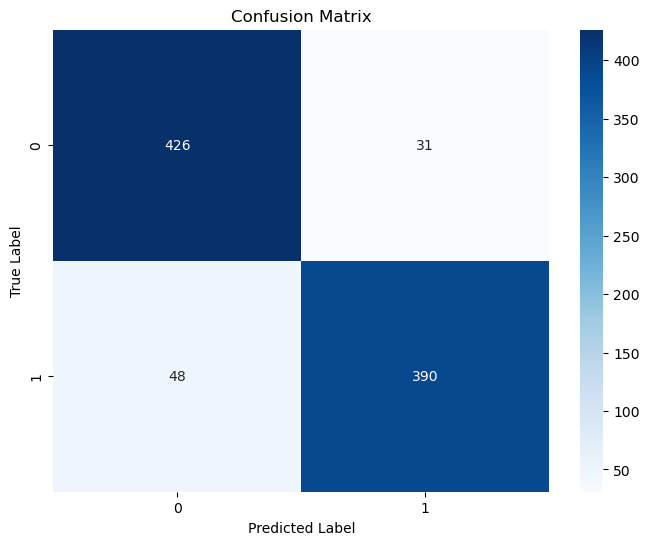

In [29]:
conf_matrix = tf.math.confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
conf_matrix_df = pd.DataFrame(conf_matrix.numpy(), index=["Quality", "Defective"], columns=["Quality", "Defective"])

In [31]:
precision_quality = conf_matrix_df.loc["Quality", "Quality"] / conf_matrix_df["Quality"].sum()
precision_defective = conf_matrix_df.loc["Defective", "Defective"] / conf_matrix_df["Defective"].sum()
recall_quality = conf_matrix_df.loc["Quality", "Quality"] / conf_matrix_df.loc["Quality"].sum()
recall_defective = conf_matrix_df.loc["Defective", "Defective"] / conf_matrix_df.loc["Defective"].sum()

In [33]:
print("Precision (Quality):", precision_quality)
print("Recall (Quality):", recall_quality)
print("F1-Score (Quality):", f1_score_quality)
print("Precision (Defective):", precision_defective)
print("Recall (Defective):", recall_defective)
print("F1-Score (Defective):", f1_score_defective)

Precision (Quality): 0.8987341772151899
Recall (Quality): 0.9321663019693655
F1-Score (Quality): 0.9151450053705693
Precision (Defective): 0.9263657957244655
Recall (Defective): 0.8904109589041096
F1-Score (Defective): 0.9080325960419091


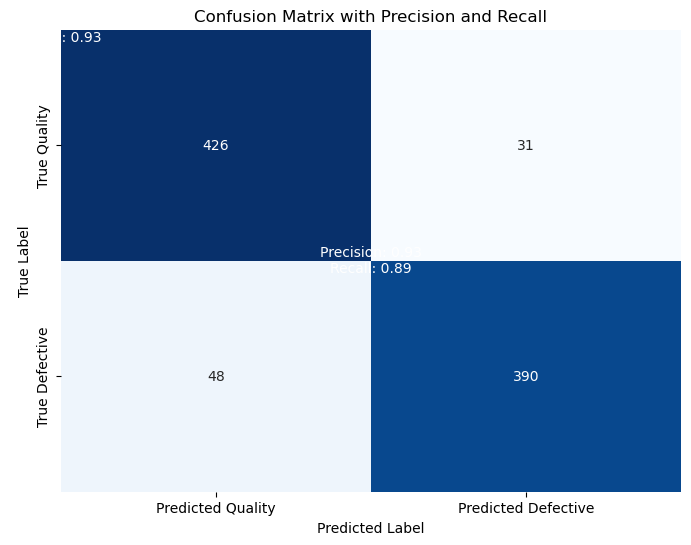

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Quality', 'Predicted Defective'],
            yticklabels=['True Quality', 'True Defective'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Precision and Recall')
plt.text(0, 0, f'Precision: {precision_quality:.2f}\nRecall: {recall_quality:.2f}', ha="center", va="center", color="white")
plt.text(1, 1, f'Precision: {precision_defective:.2f}\nRecall: {recall_defective:.2f}', ha="center", va="center", color="white")
plt.show()